In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as num
from sklearn.linear_model import LinearRegression

In [3]:
read_data = pd.read_csv("rawdata.csv")
read_data.set_index("Brands", inplace=True)
print(read_data.head())

            2016      2017     2018      2019     2020     2021      2022  \
Brands                                                                      
Apple      79918     92956    36311     98601    70320    51261     92014   
Mi       3315550   1409596  9277163   1660474  9992642  8448689   3212109   
Samsung  9394877   6224008  2676267  10854249  9698714  5601749  11744976   
Nokia    9957350  10681674  8963409   9150408  8832315  7767173   5021397   
Moto     8811559   8960636  9256990   5709109  9261169  1095159  11050079   

            2023  
Brands            
Apple      78019  
Mi       3837745  
Samsung  6454424  
Nokia    9566786  
Moto     2209602  


In [4]:
years = num.array([int(year) for year in read_data.columns]).reshape(-1,1)
print(years)
predictions = {}

[[2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]]


In [5]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Apple to Oppo
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2016    7 non-null      int64
 1   2017    7 non-null      int64
 2   2018    7 non-null      int64
 3   2019    7 non-null      int64
 4   2020    7 non-null      int64
 5   2021    7 non-null      int64
 6   2022    7 non-null      int64
 7   2023    7 non-null      int64
dtypes: int64(8)
memory usage: 504.0+ bytes


In [6]:
read_data.describe()

,2016,2017,2018,2019,2020,2021,2022,2023
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,5.581125e+06,4.780124e+06,6.056361e+06,6.105272e+06,6.658697e+06,4.839296e+06,6.788604e+06,5.277604e+06
std,3.803086e+06,4.093700e+06,3.589798e+06,3.926998e+06,3.895124e+06,3.230523e+06,4.567590e+06,3.465922e+06
min,7.991800e+04,9.295600e+04,3.631100e+04,9.860100e+04,7.032000e+04,5.126100e+04,9.201400e+04,7.801900e+04
25%,3.266034e+06,1.304750e+06,4.114330e+06,3.684792e+06,4.377859e+06,2.690868e+06,4.116753e+06,3.023674e+06
50%,4.292105e+06,4.892096e+06,6.631994e+06,7.478769e+06,8.832315e+06,5.601749e+06,5.224112e+06,5.852808e+06
75%,9.103218e+06,7.592322e+06,9.110200e+06,8.467850e+06,9.479942e+06,7.195818e+06,1.111281e+07,7.699135e+06
max,9.957350e+06,1.068167e+07,9.277163e+06,1.085425e+07,9.992642e+06,8.448689e+06,1.174498e+07,9.566786e+06


In [9]:
read_data.head()

,2016,2017,2018,2019,2020,2021,2022,2023
Brands,,,,,,,,
Apple,79918,92956,36311,98601,70320,51261,92014,78019
Mi,3315550,1409596,9277163,1660474,9992642,8448689,3212109,3837745
Samsung,9394877,6224008,2676267,10854249,9698714,5601749,11744976,6454424
Nokia,9957350,10681674,8963409,9150408,8832315,7767173,5021397,9566786
Moto,8811559,8960636,9256990,5709109,9261169,1095159,11050079,2209602


In [10]:
read_data.tail()

,2016,2017,2018,2019,2020,2021,2022,2023
Brands,,,,,,,,
Samsung,9394877,6224008,2676267,10854249,9698714,5601749,11744976,6454424
Nokia,9957350,10681674,8963409,9150408,8832315,7767173,5021397,9566786
Moto,8811559,8960636,9256990,5709109,9261169,1095159,11050079,2209602
Vivo,3216518,1199904,6631994,7478769,6015910,4286578,11175540,5852808
Oppo,4292105,4892096,5552392,7785292,2739808,6624464,5224112,8943846


In [16]:
for brand in read_data.index:
    sale=read_data.loc[brand].values.reshape(-1,1)
    model=LinearRegression().fit(years,sale)
    f_years=num.array([2024,2025,2026,2027,2028]).reshape(-1,1)
    p_sales=model.predict(f_years).flatten()
    predictions[brand]=p_sales

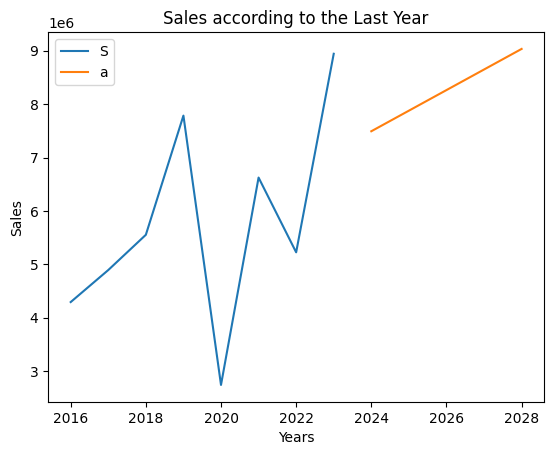

In [17]:
plt.plot(range(2016, 2024), sale.flatten(), label = "Actual_Sales")
plt.plot(range(2024, 2029), p_sales, label="Predicted Sales")
plt.ylabel("Sales")
plt.xlabel("Years")
plt.title("Sales according to the Last Year")
plt.legend("Sales")
plt.show()

In [18]:
p_data = pd.DataFrame(predictions, index = range(2024, 2029))
print(p_data)

             Apple            Mi       Samsung         Nokia          Moto  \
2024  74848.178571  6.136104e+06  8.615582e+06  6.870664e+06  4.006792e+06   
2025  74831.107143  6.356516e+06  8.789898e+06  6.454686e+06  3.331793e+06   
2026  74814.035714  6.576929e+06  8.964215e+06  6.038708e+06  2.656794e+06   
2027  74796.964286  6.797342e+06  9.138531e+06  5.622731e+06  1.981795e+06   
2028  74779.892857  7.017755e+06  9.312848e+06  5.206753e+06  1.306796e+06   

              Vivo          Oppo  
2024  8.937597e+06  7.492104e+06  
2025  9.649896e+06  7.877735e+06  
2026  1.036220e+07  8.263365e+06  
2027  1.107449e+07  8.648996e+06  
2028  1.178679e+07  9.034627e+06  
